In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import RegularGridInterpolator,interp1d
import kitcolors as kit 
from scipy.interpolate import interp1d


In [22]:
def plotls(data,name="tmp"):
    plt.style.use("kitish")
    fig,ax = plt.subplots(figsize=(3.0,2.6)) 
    p = ax.pcolormesh(X,Y,data,cmap = "plasma",vmin = 0,vmax = 0.4,rasterized = True)
    ax.set_xticks([-1.5,1.5])
    ax.set_xticklabels([r"$-1.5$", r"$1.5$"])
    ax.set_xlabel(r"$x$ [cm]",labelpad = -5)
    ax.set_yticks([-1.5,1.5])
    ax.set_yticklabels([r"$-1.5$", r"$1.5$"])
    ax.set_ylabel(r"$y$ [cm]",labelpad = -15)

    #cbaxes = fig.add_axes([1.05, 0.0, 0.05, 0.5]) 
    p.cmap.set_over("gray")
    clb = fig.colorbar(p,orientation = "vertical",ax=ax,ticks = [ 0,0.2,0.4],
                       extend='max',extendfrac=0.05,shrink = 0.55,pad = -0.04,aspect = 10)
    clb.ax.set_title(r"$\phi(x,y)$",horizontalalignment="center")
    ax.set_xlim([-1.5,1.5])
    ax.set_ylim([-1.5,1.5])
    ax.set_aspect('equal', 'box')
    ax.margins(x=0.0,y=0) 
    plt.setp(ax.spines.values(), linewidth=0)
    plt.savefig(f"{name}.pdf",constrained_layout=True)

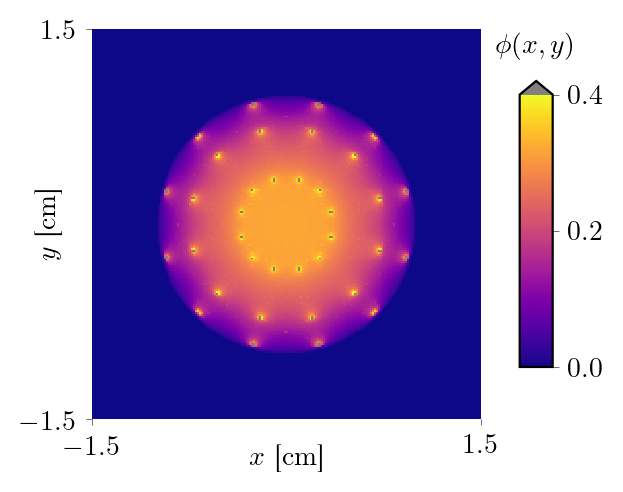

In [23]:
data = np.loadtxt("finalphi.txt",delimiter="\t")
ny,nx = data.shape
full = np.zeros((2*ny,2*nx))
full[nx:,ny:] = data
full[nx:,:ny] = data[:,::-1]
full[:nx,ny:] = data[::-1,:]
full[:nx,:ny] = data[::-1,::-1]

nx,ny = full.shape
X = np.linspace(-1.5,1.5,nx+1)
Y = np.linspace(-1.5,1.5,ny+1)
XX,YY = np.meshgrid(X,Y)
dataRHS = full/4/np.pi
plotls(dataRHS,name ="ContributionRHS")


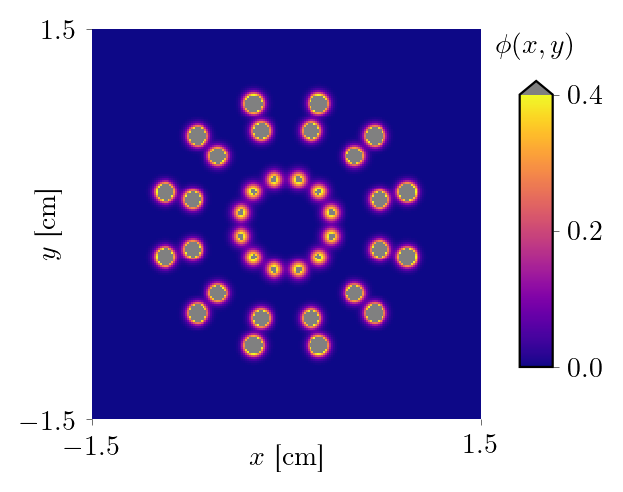

In [24]:
dataIC = np.loadtxt("phi0.txt",delimiter="\t")
ny,nx = dataIC.shape
X = np.linspace(-1.5,1.5,nx+1)
Y = np.linspace(-1.5,1.5,ny+1)
XX,YY = np.meshgrid(X,Y)
plotls(dataIC,name ="ContributionIC")

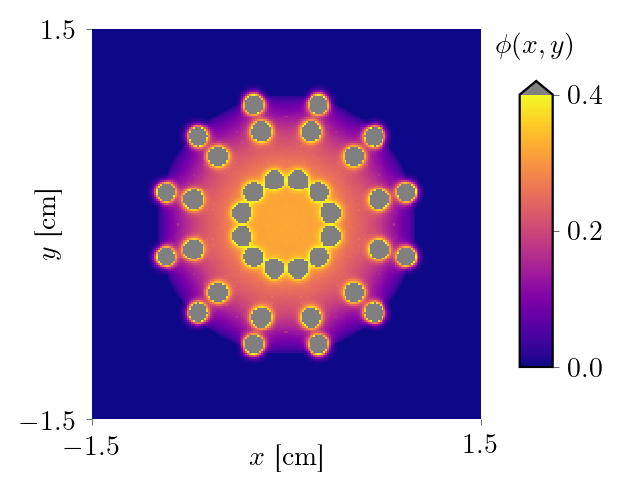

In [25]:
plotls(dataIC+dataRHS,name ="ContributionCombined")

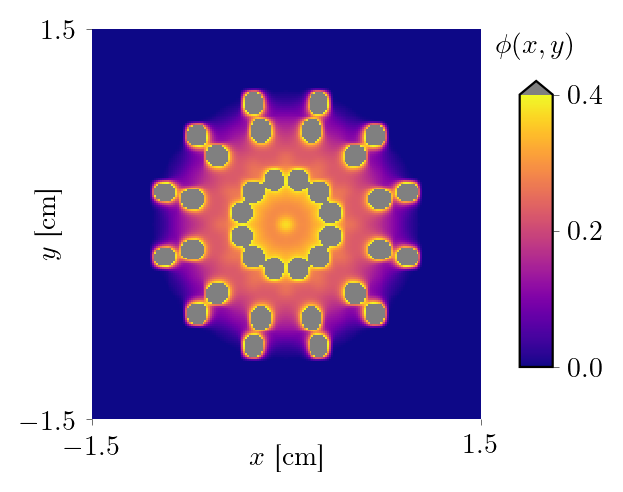

In [36]:
data = np.loadtxt("phi36.txt",delimiter=" ")
ny,nx = dataIC.shape
X = np.linspace(-1.5,1.5,nx+1)
Y = np.linspace(-1.5,1.5,ny+1)
XX,YY = np.meshgrid(X,Y)
scale = 9/200/200
plotls(data/scale,name ="SN36")